<a href="https://colab.research.google.com/github/MirasKaidullayev/NMT/blob/main/NMT_Kaz_Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_repo = 'google/mt5-small'
model_path = '/content/gdrive/My Drive/mt5_translation_kaz.pt'
max_seq_len = 20

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# Model description: https://huggingface.co/google/mt5-base
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
token_ids = tokenizer.encode(
    '<kz> This will be translated to Kazakh! (hopefully)',
    return_tensors='pt').cuda()
print(token_ids)

model_out = model.generate(token_ids)
print(model_out)

output_text = tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(model_out[0]))
print(output_text)

In [ ]:
from google.colab import files
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text, language):
    # Tokenize text
    tokens = word_tokenize(text)

    # Lowercase tokens
    tokens = [token.lower() for token in tokens]

    # Remove punctuation
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]

    # Remove stopwords
    if language == 'english':
        stop_words = set(stopwords.words('english'))
    elif language == 'kazakh':
        # You might need to provide your own list of Kazakh stopwords
        stop_words = set(["list", "of", "kazakh", "stop", "words"])
    else:
        raise ValueError("Unsupported language")

    tokens = [token for token in tokens if token not in stop_words]

    # Rejoin tokens into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Upload the Kazakh text file
uploaded_kazakh = files.upload()

# Get the path to the uploaded Kazakh file
uploaded_kazakh_file_path = next(iter(uploaded_kazakh))

# Read the content of the uploaded Kazakh file
with open(uploaded_kazakh_file_path, 'r', encoding='utf-8') as file:
    kazakh_text = file.read()

# Preprocess the Kazakh text
preprocessed_kazakh_text = preprocess_text(kazakh_text, 'kazakh')

# Upload the English text file
uploaded_english = files.upload()

# Get the path to the uploaded English file
uploaded_english_file_path = next(iter(uploaded_english))

# Read the content of the uploaded English file
with open(uploaded_english_file_path, 'r', encoding='utf-8') as file:
    english_text = file.read()

# Preprocess the English text
preprocessed_english_text = preprocess_text(english_text, 'english')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming you have preprocessed Kazakh and English texts stored in preprocessed_kazakh_text and preprocessed_english_text variables

# Tokenize Kazakh text
kazakh_tokenizer = Tokenizer(filters='')
kazakh_tokenizer.fit_on_texts(preprocessed_kazakh_text)
kazakh_sequences = kazakh_tokenizer.texts_to_sequences(preprocessed_kazakh_text)
kazakh_maxlen = max(len(seq) for seq in kazakh_sequences)
kazakh_vocab_size = len(kazakh_tokenizer.word_index) + 1

# Tokenize English text
english_tokenizer = Tokenizer(filters='')
english_tokenizer.fit_on_texts(preprocessed_english_text)
english_sequences = english_tokenizer.texts_to_sequences(preprocessed_english_text)
english_maxlen = max(len(seq) for seq in english_sequences)
english_vocab_size = len(english_tokenizer.word_index) + 1

# Pad sequences to the same length
kazakh_sequences_padded = pad_sequences(kazakh_sequences, maxlen=kazakh_maxlen, padding='post')
english_sequences_padded = pad_sequences(english_sequences, maxlen=english_maxlen, padding='post')

# Split data into training and validation sets
kazakh_train, kazakh_val, english_train, english_val = train_test_split(kazakh_sequences_padded, english_sequences_padded, test_size=0.2, random_state=42)

# Define the NMT model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(kazakh_vocab_size, 256, input_length=kazakh_maxlen, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.RepeatVector(english_maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(english_vocab_size, activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(kazakh_train, english_train, validation_data=(kazakh_val, english_val), epochs=10, batch_size=64)

In [ ]:
# Split data into training and validation sets
print("Kazakh train shape:", kazakh_train.shape)
print("English train shape:", english_train.shape)
print("Kazakh val shape:", kazakh_val.shape)
print("English val shape:", english_val.shape)

# Debugging: Print the number of samples in each dataset
print("Number of samples in Kazakh train:", len(kazakh_train))
print("Number of samples in English train:", len(english_train))
print("Number of samples in Kazakh val:", len(kazakh_val))
print("Number of samples in English val:", len(english_val))

# Ensure the number of samples is consistent between Kazakh and English datasets
assert len(kazakh_train) == len(english_train)
assert len(kazakh_val) == len(english_val)

In [ ]:
num_samples_to_inspect = 5

# Print a few sample pairs of Kazakh and English texts for manual inspection
for i in range(num_samples_to_inspect):
    print("Kazakh Text:", kazakh_text[i])
    print("English Translation:", english_text[i])
    print()

Kazakh Text: 5
English Translation: D

Kazakh Text: g
English Translation: e

Kazakh Text:  
English Translation: s

Kazakh Text: ұ
English Translation: i

Kazakh Text: я
English Translation: g



In [ ]:
def align_texts(text1, text2):
    sentences1 = text1.split('\n')
    sentences2 = text2.split('\n')

    # Remove empty sentences
    sentences1 = [sent.strip() for sent in sentences1 if sent.strip()]
    sentences2 = [sent.strip() for sent in sentences2 if sent.strip()]

    # Align sentences based on their content
    aligned_sentences = []
    for sent1 in sentences1:
        best_match = None
        max_similarity = 0
        for sent2 in sentences2:
            similarity = calculate_similarity(sent1, sent2)
            if similarity > max_similarity:
                max_similarity = similarity
                best_match = sent2
        if best_match is not None:
            aligned_sentences.append((sent1, best_match))

    return aligned_sentences

def calculate_similarity(sent1, sent2):
    # Implement a similarity measure, such as Levenshtein distance, cosine similarity, etc.
    # Here, we use a simple example where similarity is the number of common words
    words1 = set(sent1.split())
    words2 = set(sent2.split())
    common_words = len(words1.intersection(words2))
    total_words = len(words1) + len(words2)
    similarity = common_words / total_words
    return similarity


aligned_sentences = align_texts(kazakh_text, english_text)


for sent1, sent2 in raw_tex:
    print("Kazakh:", sent1)
    print("English:", sent2)
    print()

Kazakh: 5g ұялы байланыс технологиясы негізінде Заттар интернетінің ақпаратын интерактивті қабылдау Жүйесін әзірлеу
English: 2. Advantages of 5g Mobile Communication Technology

Kazakh: Сучжоу өнеркәсіптік технологиялар кәсіби институты, Сучжоу, Цзянсу, 215104, Қытай
English: Suzhou Vocational Institute of Industrial Technology, Suzhou, Jiangsu, 215104, China

Kazakh: Түйінді сөздер: 5g ұялы байланысы, Заттар интернеті, уақытты дамыту
English: 2. Advantages of 5g Mobile Communication Technology

Kazakh: Қазір адамзат қоғамы 5G мобильді ақпарат дәуіріне еніп, Заттар интернеті де пайда болды.
English: Keywords: 5G Mobile Communication, Internet of Things, Development of the Times

Kazakh: Заттар интернеті негізінен заттар арасындағы байланыс пен байланыспен айналысады, негізінен 5G ұялы байланыс технологиясын қолданады, бұл заттар мәселесін шешуге көмектеседі.байланыс пен байланыс арасындағы кедергі сонымен қатар қазіргі қоғамның көптеген салаларында жиі талқыланатын бағыт болып табылады

In [ ]:
with open('kazakh_text.txt', 'r', encoding='utf-8') as f:
    kazakh_lines = f.readlines()

# Read English text file
with open('english_text.txt', 'r', encoding='utf-8') as f:
    english_lines = f.readlines()

# Zip Kazakh and English lines into tuples
aligned_sentences = list(zip(kazakh_lines, english_lines))

# Print a sample of aligned sentences
for kazakh_sentence, english_sentence in aligned_sentences[:5]:
    print("Kazakh:", kazakh_sentence.strip())
    print("English:", english_sentence.strip())
    print()

Kazakh: 5g ұялы байланыс технологиясы негізінде Заттар интернетінің ақпаратын интерактивті қабылдау Жүйесін әзірлеу
English: Design of Internet of Things Information Interactive Perception System Based on 5G Mobile Communication Technology

Kazakh: Сучжоу өнеркәсіптік технологиялар кәсіби институты, Сучжоу, Цзянсу, 215104, Қытай
English: Suzhou Vocational Institute of Industrial Technology, Suzhou, Jiangsu, 215104, China

Kazakh: Түйінді сөздер: 5g ұялы байланысы, Заттар интернеті, уақытты дамыту
English: Keywords: 5G Mobile Communication, Internet of Things, Development of the Times

Kazakh: Аннотация: соңғы жылдары интернет-технологиялар мен компьютерлік технологиялардың үздіксіз реформалануы мен ілгерілеуіне байланысты ұялы байланыс технологиялары да кеңінен дамыды.
English: Abstract: In recent years, with the continuous reform and progress of Internet technology and computer technology, mobile communication technology also has a cross era development.

Kazakh: Қазір адамзат қоғамы 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming aligned_sentences is a list of tuples containing aligned Kazakh and English sentences
sent1, sent2 = zip(*aligned_sentences)

# Tokenize Kazakh sentences
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(sent1)
sequences1 = tokenizer1.texts_to_sequences(sent1)
max_len1 = max(len(seq) for seq in sequences1)

# Tokenize English sentences
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(sent2)
sequences2 = tokenizer2.texts_to_sequences(sent2)
max_len2 = max(len(seq) for seq in sequences2)

# Pad sequences
sequences1_padded = pad_sequences(sequences1, maxlen=max_len1, padding='post')
sequences2_padded = pad_sequences(sequences2, maxlen=max_len2, padding='post')

# Prepare input and target data
encoder_input_data = np.array(sequences1_padded)
decoder_input_data = np.array(sequences2_padded[:, :-1])  # Remove last token from target sequences
decoder_target_data = np.array(sequences2_padded[:, 1:])   # Shift target sequences by one timestep

# Define the NMT model
latent_dim = 256

# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(None,))
encoder_embedding = tf.keras.layers.Embedding(input_dim=len(tokenizer1.word_index)+1, output_dim=latent_dim)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_embedding = tf.keras.layers.Embedding(input_dim=len(tokenizer2.word_index)+1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(len(tokenizer2.word_index)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
15/15 [==============================] - 15s 496ms/step - loss: 5.8080 - accuracy: 0.7397 - val_loss: 1.8563 - val_accuracy: 0.8397
Epoch 2/10
15/15 [==============================] - 3s 174ms/step - loss: 1.9438 - accuracy: 0.7918 - val_loss: 1.4516 - val_accuracy: 0.8397
Epoch 3/10
15/15 [==============================] - 2s 164ms/step - loss: 1.8188 - accuracy: 0.7841 - val_loss: 1.4004 - val_accuracy: 0.8397
Epoch 4/10
15/15 [==============================] - 2s 161ms/step - loss: 1.6974 - accuracy: 0.7918 - val_loss: 1.4079 - val_accuracy: 0.8397
Epoch 5/10
15/15 [==============================] - 4s 245ms/step - loss: 1.6752 - accuracy: 0.7918 - val_loss: 1.4139 - val_accuracy: 0.8397
Epoch 6/10
15/15 [==============================] - 2s 158ms/step - loss: 1.6407 - accuracy: 0.7918 - val_loss: 1.3797 - val_accuracy: 0.8397
Epoch 7/10
15/15 [==============================] - 2s 145ms/step - loss: 1.5881 - accuracy: 0.7918 - val_loss: 1.3304 - val_accuracy: 0.8397
Epoch

Epoch 1/10
15/15 [==============================] - 12s 290ms/step - loss: 5.8254 - accuracy: 0.7362 - val_loss: 1.8011 - val_accuracy: 0.8397
Epoch 2/10
15/15 [==============================] - 3s 177ms/step - loss: 1.9412 - accuracy: 0.7918 - val_loss: 1.4482 - val_accuracy: 0.8397
Epoch 3/10
15/15 [==============================] - 3s 229ms/step - loss: 1.7429 - accuracy: 0.7918 - val_loss: 1.3994 - val_accuracy: 0.8397
Epoch 4/10
15/15 [==============================] - 3s 175ms/step - loss: 1.6925 - accuracy: 0.7918 - val_loss: 1.4217 - val_accuracy: 0.8397
Epoch 5/10
15/15 [==============================] - 2s 152ms/step - loss: 1.6660 - accuracy: 0.7918 - val_loss: 1.3924 - val_accuracy: 0.8397
Epoch 6/10
15/15 [==============================] - 2s 142ms/step - loss: 1.6312 - accuracy: 0.7918 - val_loss: 1.3659 - val_accuracy: 0.8397
Epoch 7/10
15/15 [==============================] - 2s 144ms/step - loss: 1.5692 - accuracy: 0.7918 - val_loss: 1.3047 - val_accuracy: 0.8397
Epoch

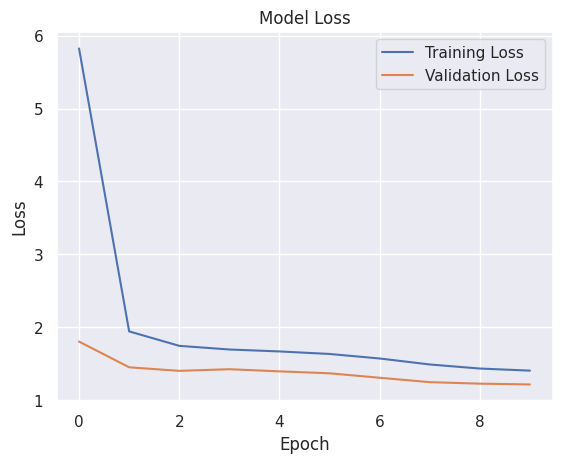

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming aligned_sentences is a list of tuples containing aligned Kazakh and English sentences
sent1, sent2 = zip(*aligned_sentences)

# Tokenize Kazakh sentences
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(sent1)
sequences1 = tokenizer1.texts_to_sequences(sent1)
max_len1 = max(len(seq) for seq in sequences1)

# Tokenize English sentences
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(sent2)
sequences2 = tokenizer2.texts_to_sequences(sent2)
max_len2 = max(len(seq) for seq in sequences2)

# Pad sequences
sequences1_padded = pad_sequences(sequences1, maxlen=max_len1, padding='post')
sequences2_padded = pad_sequences(sequences2, maxlen=max_len2, padding='post')

# Prepare input and target data
encoder_input_data = np.array(sequences1_padded)
decoder_input_data = np.array(sequences2_padded[:, :-1])  # Remove last token from target sequences
decoder_target_data = np.array(sequences2_padded[:, 1:])   # Shift target sequences by one timestep

# Define the NMT model
latent_dim = 256

# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(None,))
encoder_embedding = tf.keras.layers.Embedding(input_dim=len(tokenizer1.word_index)+1, output_dim=latent_dim)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_embedding = tf.keras.layers.Embedding(input_dim=len(tokenizer2.word_index)+1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(len(tokenizer2.word_index)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=64, epochs=10, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming aligned_sentences is a list of tuples containing aligned Kazakh and English sentences
sent1, sent2 = zip(*aligned_sentences)

# Tokenize Kazakh sentences
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(sent1)
sequences1 = tokenizer1.texts_to_sequences(sent1)
max_len1 = max(len(seq) for seq in sequences1)

# Tokenize English sentences
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(sent2)
sequences2 = tokenizer2.texts_to_sequences(sent2)
max_len2 = max(len(seq) for seq in sequences2)

# Pad sequences
sequences1_padded = pad_sequences(sequences1, maxlen=max_len1, padding='post')
sequences2_padded = pad_sequences(sequences2, maxlen=max_len2, padding='post')

# Prepare input and target data
encoder_input_data = np.array(sequences1_padded)
decoder_input_data = np.array(sequences2_padded[:, :-1])  # Remove last token from target sequences
decoder_target_data = np.array(sequences2_padded[:, 1:])   # Shift target sequences by one timestep

# Define the NMT model
latent_dim = 256

# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(None,))
encoder_embedding = tf.keras.layers.Embedding(input_dim=len(tokenizer1.word_index)+1, output_dim=latent_dim)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Attention mechanism
attention = tf.keras.layers.Attention()
context_vector = attention([encoder_outputs, encoder_outputs])

# Decoder
decoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_embedding = tf.keras.layers.Embedding(input_dim=len(tokenizer2.word_index)+1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Concatenate decoder outputs with attention context vector
decoder_concat = tf.keras.layers.Concatenate(axis=-1)([decoder_outputs, context_vector])

# Dense layer
decoder_dense = tf.keras.layers.Dense(len(tokenizer2.word_index)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat)

# Model
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=64, epochs=10, validation_split=0.2)

In [ ]:
# Assuming you have a trained NMT model named 'model' and test data named 'test_data'
aligned_sentences = test_data
# Tokenize and pad test data
test_sequences = tokenizer1.texts_to_sequences(test_data)
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_len1, padding='post')

# Translate test data
encoder_input_data_test = np.array(test_sequences_padded)
decoder_input_data_test = np.zeros_like(encoder_input_data_test)  # Dummy input for decoder (zeros)
decoder_target_data_test = np.zeros_like(encoder_input_data_test)  # Dummy target for evaluation

# Generate translations
predicted_sequences = model.predict([encoder_input_data_test, decoder_input_data_test])

# Decode predictions
decoded_sentences = []
for sequence in predicted_sequences:
    decoded_sentence = []
    for token_id in sequence:
        token = tokenizer2.index_word.get(token_id, '<unk>')  # Convert token ID to word
        if token == '<end>':  # Stop decoding at end token
            break
        decoded_sentence.append(token)
    decoded_sentences.append(' '.join(decoded_sentence))

# Evaluate translation quality (optional)
# Evaluate BLEU score, ROUGE score, or manually inspect translations

# Print translations
for input_sentence, translated_sentence in zip(test_data, decoded_sentences):
    print("Kazakh:", input_sentence)
    print("English (Translated):", translated_sentence)
    print()

In [ ]:
encoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(encoder_input)

# encoder LSTM layers
encoder_lstm1 = LSTM(512, return_sequences=True, return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_embedding)
encoder_lstm2 = LSTM(512, return_sequences=True, return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# Concatenate the final encoder states
encoder_states = [Concatenate()([state_h1, state_h2]), Concatenate()([state_c1, state_c2])]

# decoder embedding layer
decoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(decoder_input)

# decoder LSTM layers
decoder_lstm1 = LSTM(512, return_sequences=True, return_state=True)
decoder_output1, _, _ = decoder_lstm1(decoder_embedding, initial_state=encoder_states)
decoder_lstm2 = LSTM(512, return_sequences=True, return_state=True)
decoder_output2, _, _ = decoder_lstm2(decoder_output1, initial_state=encoder_states)

# attention mechanism
attention = Dot(axes=[2, 2])([decoder_output2, encoder_output2])
attention = Activation('softmax')(attention)
context = Dot(axes=[2, 1])([attention, encoder_output2])
decoder_combined_context = Concatenate(axis=-1)([context, decoder_output2])

# decoder output layer
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_output = decoder_dense(decoder_combined_context)

# NMT model
model = Model([encoder_input, decoder_input], decoder_output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Split the concatenated initial state into two halves
state_h, state_c = tf.split(encoder_states[0], num_or_size_splits=2, axis=1)
encoder_state_h = [state_h, state_h]  # Repeat the forward and backward states for both LSTM layers
encoder_state_c = [state_c, state_c]

# Define and compile the BRNN model
latent_dim = 256

encoder_inputs = tf.keras.layers.Input(shape=(None,))
encoder_embedding = tf.keras.layers.Embedding(input_dim=len(source_tokenizer.word_index)+1, output_dim=latent_dim)(encoder_inputs)
encoder_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm(encoder_embedding)
state_h = tf.keras.layers.Concatenate()([forward_h, backward_h])
state_c = tf.keras.layers.Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]

decoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_embedding = tf.keras.layers.Embedding(input_dim=len(target_tokenizer.word_index)+1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True))
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(len(target_tokenizer.word_index)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

source_tokenizer = Tokenizer()
source_tokenizer.fit_on_texts(source_sentences)
source_sequences = source_tokenizer.texts_to_sequences(source_sentences)

target_tokenizer = Tokenizer()
target_tokenizer.fit_on_texts(target_sentences)
target_sequences = target_tokenizer.texts_to_sequences(target_sentences)


source_maxlen = max(len(seq) for seq in source_sequences)
target_maxlen = max(len(seq) for seq in target_sequences)

source_sequences_padded = pad_sequences(source_sequences, maxlen=source_maxlen, padding='post')
target_sequences_padded = pad_sequences(target_sequences, maxlen=target_maxlen, padding='post')


encoder_input_data = np.array(source_sequences_padded)
decoder_input_data = np.array([[target_seq[:-1] for target_seq in target_sequences_padded]])
decoder_target_data = np.array([[target_seq[1:] for target_seq in target_sequences_padded]])

# Define the NMT model
latent_dim = 256

# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(None,))
encoder_embedding = tf.keras.layers.Embedding(input_dim=len(source_tokenizer.word_index)+1, output_dim=latent_dim)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_embedding = tf.keras.layers.Embedding(input_dim=len(target_tokenizer.word_index)+1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(len(target_tokenizer.word_index)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Split the concatenated initial state into two halves
state_h, state_c = tf.split(encoder_states[0], num_or_size_splits=2, axis=1)
state_h_forward, state_h_backward = tf.split(state_h, num_or_size_splits=2, axis=1)
state_c_forward, state_c_backward = tf.split(state_c, num_or_size_splits=2, axis=1)

# Define initial state for decoder LSTM
initial_state = [state_h_forward, state_c_forward, state_h_backward, state_c_backward]

# Define and compile the BRNN model
latent_dim = 256

decoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_embedding = tf.keras.layers.Embedding(input_dim=len(target_tokenizer.word_index)+1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True))
decoder_outputs, forward_h, forward_c, backward_h, backward_c = decoder_lstm(decoder_embedding, initial_state=initial_state)
decoder_state_h = tf.keras.layers.Concatenate()([forward_h, backward_h])
decoder_state_c = tf.keras.layers.Concatenate()([forward_c, backward_c])
decoder_states = [decoder_state_h, decoder_state_c]

decoder_dense = tf.keras.layers.Dense(len(target_tokenizer.word_index)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])